3.28636614833 2.95792976167
360


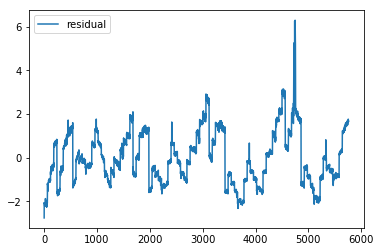

In [3]:
import math
import numpy as np
from seasonal import fit_seasons, adjust_seasons
import matplotlib.pyplot as plt
import pandas as pd

coloumn_no = 2

df = pd.read_excel('str_decomposition.xlsx')

s = []
for i in range(len(df)):
    s.append(df.iloc[i,coloumn_no])

print s[0], s[len(df)-1]

 # detrend and deseasonalize
seasons, trend = fit_seasons(s)
#print seasons
adjusted = adjust_seasons(s, seasons=seasons)
residual = adjusted - trend

print len(seasons)

plt.plot(residual, label='residual')
plt.legend(loc='upper left')
plt.show()

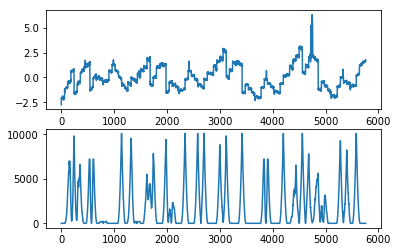

In [4]:
from luminol.anomaly_detector import AnomalyDetector
from datetime import datetime
import pandas as pd
import time
import matplotlib.pyplot as plt

coloumn_no = 0
df = pd.read_excel('str_decomposition.xlsx')
series_1 = []
for i in range(len(df)):
    dt = datetime.strptime((df.iloc[i,coloumn_no]), '%Y-%m-%dT%H:%M:%S.%fZ')
    series_1.append(int(time.mktime(dt.timetuple())))
    
ts = dict(zip(series_1, residual.tolist()))
my_detector = AnomalyDetector(ts)
score = my_detector.get_all_scores()
anom_score = []

for (timestamp, value) in score.iteritems():
    t_str = time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(timestamp))
    anom_score.append([t_str, value])

tmp_lst =[]
for score in anom_score:
    #print score
    tmp_lst.append(score[1])


plt.subplot(2, 1, 1)
plt.plot(residual.tolist())

plt.subplot(2, 1, 2)
plt.plot(tmp_lst)

plt.show()